In [1]:
import sys
sys.path.append('../gefera')
import gefera as gf
from pd import flux
import matplotlib.pyplot as plt

In [13]:
t = np.linspace(67.8, 68.8, 10000)

ap = 1.0
tp = 0.2
ep = 0.2
pp = 365
wp = 0.1 * np.pi / 180
ip = 90.0 * np.pi / 180

am = 0.007
tm = -1.9
em = 0.1
pm = 5
om = 20 * np.pi / 180
wm = 90 * np.pi / 180
im = 89.0 * np.pi / 180
mm = 0.5

u1 = 0.5
u2 = 0.3
rp = 0.2
rm = 0.1

po = gf.BarycenterOrbit(ap, tp, ep, pp, wp, ip)
mo = gf.MoonOrbit(am, tm, em, pm, om, wm, im, mm)
sys = gf.System(po, mo)
p, m = sys.coords(t)
xp, yp, _ = p
xm, ym, _ = m

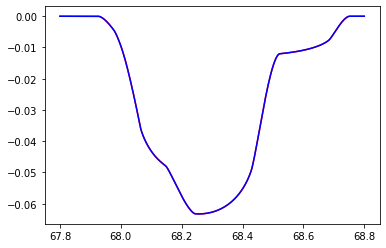

In [14]:
f = flux(xp, yp, xm, ym, rp, rm, u1, u2)
plt.plot(t, f - 1, color='r')
plt.plot(t, sys.lightcurve(t, u1, u2, rp, rm), color='b')

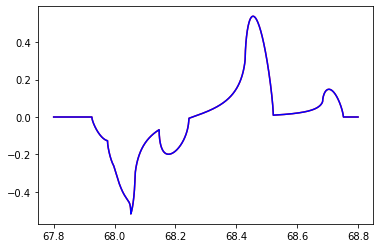

In [15]:
f = flux(xp, yp, xm, ym, rp, rm, u1, u2)
plt.plot(t[1:], np.diff(f)/(t[1] - t[0]), color='r')

lc = sys.lightcurve(t, u1, u2, rp, rm)
plt.plot(t[1:], np.diff(lc)/(t[1] - t[0]), color='b')

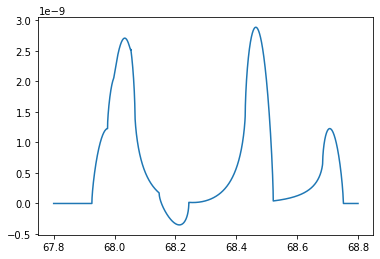

In [16]:
plt.plot(t, f - sys.lightcurve(t, u1, u2, rp, rm) - 1)
#plt.xlim(68.2, 68.3)

In [ ]:
def photodynam_flux(xp, yp, xm, ym, rp, rm, u1, u2):

    j = len(xp)
    xp = (ctypes.c_double * j).from_buffer(xp)
    yp = (ctypes.c_double * j).from_buffer(yp)
    xm = (ctypes.c_double * j).from_buffer(xm)
    ym = (ctypes.c_double * j).from_buffer(ym)
    f = (ctypes.c_double * j).from_buffer(np.zeros(j))
    j = ctypes.c_int(j)

    rp = ctypes.c_double(rp)
    rm = ctypes.c_double(rm)
    u1 = ctypes.c_double(u1)
    u2 = ctypes.c_double(u2)

    clib.flux.restype = None
    clib.flux(f, xp, yp, xm, ym, rp, rm, u1, u2, j)
    return np.array(f)

In [ ]:
%time f = photodynam_flux(xp, yp, xm, ym, rp, rm, u1, u2)

In [ ]:
plt.plot(t, f)